In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# bring in data for (# of times a transport service stops in a suburb)/(# of stops)

trip_per_stop = "Resources/P1_trip_frequency.csv"
trip_per_stop_df = pd.read_csv(trip_per_stop)
trip_per_stop_df

,Suburb,bus,train,tram,Grand Total,trips_per_stop
0,Abbotsford,4473.0,700.0,916.0,6089,276.772727
1,Aberfeldie,1576.0,NaN,NaN,1576,87.555556
2,Acheron,4.0,NaN,NaN,4,2.000000
3,after,228.0,NaN,NaN,228,114.000000
4,Aintree,560.0,NaN,NaN,560,29.473684
...,...,...,...,...,...,...
448,Yan Yean,880.0,NaN,NaN,880,88.000000
449,Yarra Glen,54.0,NaN,NaN,54,13.500000
450,Yarra Junction,322.0,NaN,NaN,322,20.125000
451,Yarrambat,1418.0,NaN,NaN,1418,78.777778


<AxesSubplot:title={'center':'number of trips per stop '}, ylabel='trips/stop'>

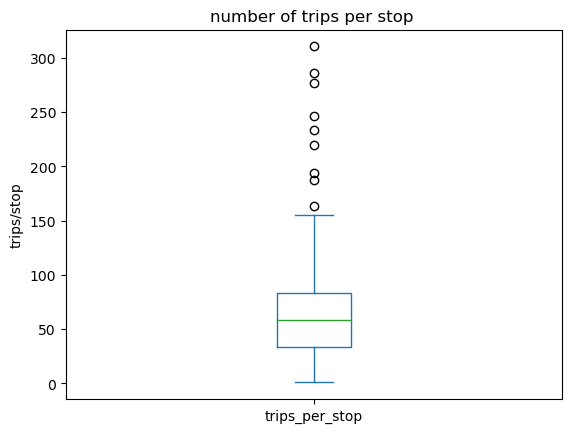

In [3]:
# Generate a box plot for the trips_per_stop to identify outliers
trip_per_stop_df["trips_per_stop"].plot(kind="box", ylabel="trips/stop", title="number of trips per stop ")


In [4]:
# remove outliers
trip_per_stop_no_outliers_df = trip_per_stop_df.loc[trip_per_stop_df["trips_per_stop"] < 150]
trip_per_stop_no_outliers_df

,Suburb,bus,train,tram,Grand Total,trips_per_stop
1,Aberfeldie,1576.0,NaN,NaN,1576,87.555556
2,Acheron,4.0,NaN,NaN,4,2.000000
3,after,228.0,NaN,NaN,228,114.000000
4,Aintree,560.0,NaN,NaN,560,29.473684
5,Airport West,2716.0,NaN,1466.0,4182,70.881356
...,...,...,...,...,...,...
448,Yan Yean,880.0,NaN,NaN,880,88.000000
449,Yarra Glen,54.0,NaN,NaN,54,13.500000
450,Yarra Junction,322.0,NaN,NaN,322,20.125000
451,Yarrambat,1418.0,NaN,NaN,1418,78.777778


In [5]:
# bring in data for (population growth)

growth = "Resources/growth.csv"
growth_df = pd.read_csv(growth)
growth_df

,Suburb,Unnamed: 1,Area Name,Total 2016,Total 2021,Total 2026,Total 2031,Total 2036,GCCSA,Total Growth,Total Growth %
0,Brunswick,104,Brunswick,27435,31237,33919,36489,39114,2GMEL,11679,43%
1,Brunswick East,105,Brunswick East,11716,14933,16282,17791,19327,2GMEL,7611,65%
2,Brunswick West,106,Brunswick West,14523,16503,17161,17950,18767,2GMEL,4244,29%
3,Coburg,107,Coburg,27802,30690,33085,35805,38578,2GMEL,10776,39%
4,Pascoe Vale South,108,Pascoe Vale South,10465,11267,11923,12572,13241,2GMEL,2776,27%
...,...,...,...,...,...,...,...,...,...,...,...
304,Mount Eliza,408,Mount Eliza,18696,19338,19992,20702,21470,2GMEL,2774,0.148373984
305,Mount Martha,409,Mount Martha,19365,20527,21847,23396,25179,2GMEL,5814,0.300232378
306,Point Nepean,410,Point Nepean,17999,18644,19176,19591,20061,2GMEL,2062,0.11456192
307,Rosebud - McCrae,411,Rosebud - McCrae,21613,22990,24450,25995,27629,2GMEL,6016,0.278350992


<AxesSubplot:title={'center':'population in 2021 '}, ylabel='2021 polulation'>

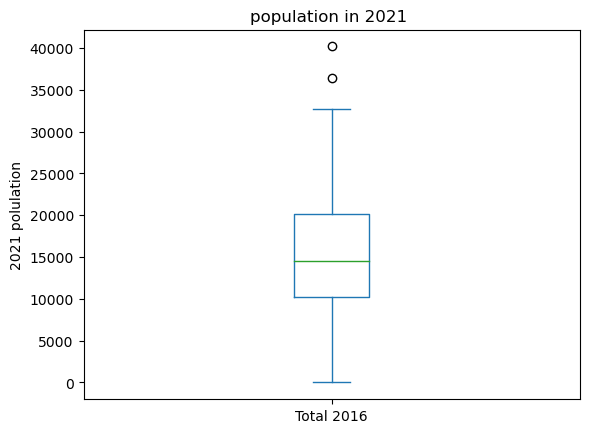

In [6]:
# Generate a box plot for population to identify outliers
growth_df["Total 2016"].plot(kind="box", ylabel="2021 polulation", title="population in 2021 ")

In [7]:
# remove outliers
growth_df_no_outliers_df = growth_df.loc[growth_df["Total 2016"] < 33000]
# Option to remove low end values as well even if not considered outliers
# growth_df_no_outliers_df = growth_df_no_outliers_df.loc[growth_df_no_outliers_df["Total 2016"] > 0]
growth_df_no_outliers_df

,Suburb,Unnamed: 1,Area Name,Total 2016,Total 2021,Total 2026,Total 2031,Total 2036,GCCSA,Total Growth,Total Growth %
0,Brunswick,104,Brunswick,27435,31237,33919,36489,39114,2GMEL,11679,43%
1,Brunswick East,105,Brunswick East,11716,14933,16282,17791,19327,2GMEL,7611,65%
2,Brunswick West,106,Brunswick West,14523,16503,17161,17950,18767,2GMEL,4244,29%
3,Coburg,107,Coburg,27802,30690,33085,35805,38578,2GMEL,10776,39%
4,Pascoe Vale South,108,Pascoe Vale South,10465,11267,11923,12572,13241,2GMEL,2776,27%
...,...,...,...,...,...,...,...,...,...,...,...
304,Mount Eliza,408,Mount Eliza,18696,19338,19992,20702,21470,2GMEL,2774,0.148373984
305,Mount Martha,409,Mount Martha,19365,20527,21847,23396,25179,2GMEL,5814,0.300232378
306,Point Nepean,410,Point Nepean,17999,18644,19176,19591,20061,2GMEL,2062,0.11456192
307,Rosebud - McCrae,411,Rosebud - McCrae,21613,22990,24450,25995,27629,2GMEL,6016,0.278350992


In [8]:
# merging  trips/stop and growth data
merge_df = pd.merge(growth_df_no_outliers_df, trip_per_stop_no_outliers_df, on=["Suburb"])
merge_df

,Suburb,Unnamed: 1,Area Name,Total 2016,Total 2021,Total 2026,Total 2031,Total 2036,GCCSA,Total Growth,Total Growth %,bus,train,tram,Grand Total,trips_per_stop
0,Brunswick,104,Brunswick,27435,31237,33919,36489,39114,2GMEL,11679,43%,4031.0,690.0,3932.0,8653,85.673267
1,Brunswick East,105,Brunswick East,11716,14933,16282,17791,19327,2GMEL,7611,65%,2059.0,NaN,4326.0,6385,118.240741
2,Brunswick West,106,Brunswick West,14523,16503,17161,17950,18767,2GMEL,4244,29%,3234.0,NaN,2340.0,5574,55.188119
3,Coburg,107,Coburg,27802,30690,33085,35805,38578,2GMEL,10776,39%,8754.0,460.0,5261.0,14475,105.656934
4,Pascoe Vale South,108,Pascoe Vale South,10465,11267,11923,12572,13241,2GMEL,2776,27%,2753.0,NaN,1300.0,4053,75.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Flinders,405,Flinders,5642,5693,5797,5937,6110,2GMEL,468,0.082949309,24.0,NaN,NaN,24,4.800000
217,Mornington,407,Mornington,25030,26542,28039,29653,31386,2GMEL,6356,0.253935278,3719.0,NaN,NaN,3719,31.516949
218,Mount Eliza,408,Mount Eliza,18696,19338,19992,20702,21470,2GMEL,2774,0.148373984,2044.0,NaN,NaN,2044,75.703704
219,Mount Martha,409,Mount Martha,19365,20527,21847,23396,25179,2GMEL,5814,0.300232378,1913.0,NaN,NaN,1913,24.215190


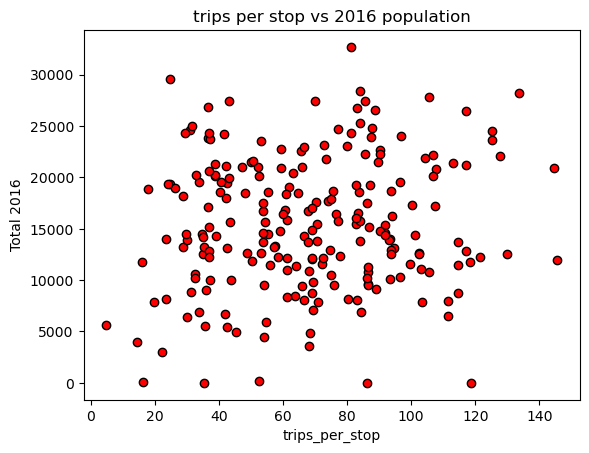

In [9]:

plt.scatter(merge_df["trips_per_stop"], merge_df["Total 2016"], marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("trips per stop vs 2016 population")
plt.xlabel("trips_per_stop")
plt.ylabel("Total 2016")


# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is 0.11


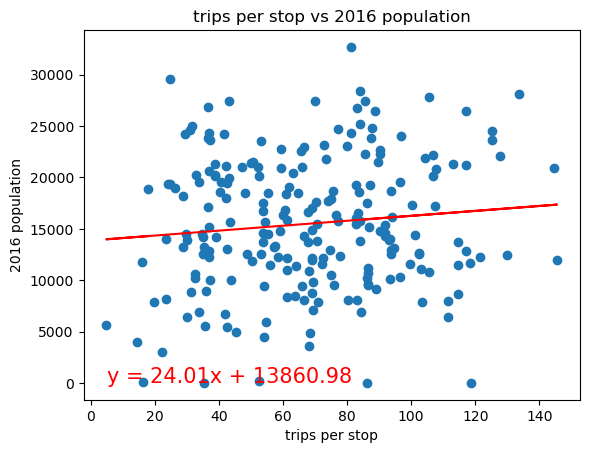

In [10]:
# Linear regression on Northern Hemisphere

tps = merge_df["trips_per_stop"]
popln = merge_df["Total 2016"]
#The correlation coefficient:
round(st.pearsonr(tps, popln)[0],2)
print(f"The r-value is {round(st.pearsonr(tps, popln)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tps, popln)
regress_values = tps * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(tps, popln)
plt.plot(tps,regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.title("trips per stop vs 2016 population")
plt.xlabel('trips per stop')
plt.ylabel('2016 population')
plt.show()